# Imports

In [1]:
# Basic imports
import sys
import os
import numpy as np
import pandas as pd
# Matplotlib imports
from   matplotlib import pyplot as plt

### Add `cachai` to the paths

In [2]:
project_root = os.path.abspath(os.path.join('..', '..'))
sys.path.append(project_root)

In [3]:
from cachai import utilities as util
from cachai import chplot as chp

# Correlation matrix

In [28]:
# Read the .csv as a data frame
df = pd.read_csv('li_correlations.csv')

# Obtain the data of interest
data = df.iloc[:, [i for i in range(1,9)]]

# Correlation matrix
names = list(data.columns)
corr_matrix = data.corr(method='spearman').to_numpy()

In [29]:
corr_matrix

array([[ 1.        , -0.34065038, -0.20892286,  0.29994554, -0.2809563 ,
         0.03323719, -0.21805159, -0.26927295],
       [-0.34065038,  1.        , -0.41704923,  0.40632697,  0.79221308,
        -0.06733031,  0.04632604,  0.09821122],
       [-0.20892286, -0.41704923,  1.        , -0.87667557, -0.55368513,
         0.10171654,  0.11743935,  0.00711886],
       [ 0.29994554,  0.40632697, -0.87667557,  1.        ,  0.55712487,
        -0.01455239,  0.02082047, -0.1344264 ],
       [-0.2809563 ,  0.79221308, -0.55368513,  0.55712487,  1.        ,
        -0.0522437 ,  0.07004073,  0.09978811],
       [ 0.03323719, -0.06733031,  0.10171654, -0.01455239, -0.0522437 ,
         1.        ,  0.19943262, -0.33051181],
       [-0.21805159,  0.04632604,  0.11743935,  0.02082047,  0.07004073,
         0.19943262,  1.        ,  0.09131998],
       [-0.26927295,  0.09821122,  0.00711886, -0.1344264 ,  0.09978811,
        -0.33051181,  0.09131998,  1.        ]])

# Chord Diagram

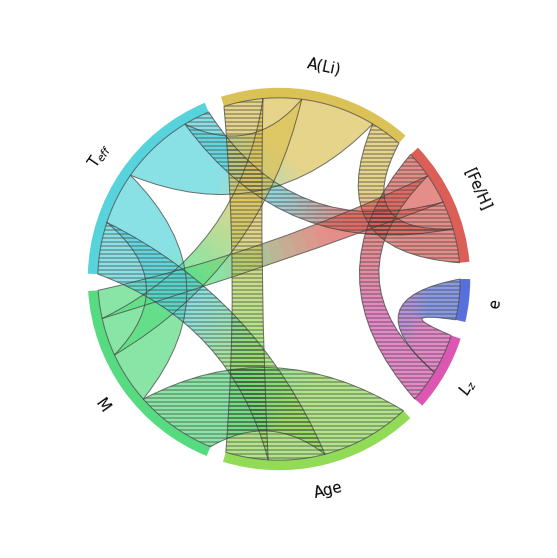

In [38]:
fig, ax = plt.subplots(figsize=(10,10),facecolor='w')

tester = chp.ChordDiagram(corr_matrix,threshold=0.25,names=names)

ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.axis('off')
ax.set_aspect('equal')

plt.show()